In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pd.read_csv(r'/content/drive/My Drive/heart_failure_prediction/Input/heart_failure_clinical_records_dataset.csv')

In [ ]:
print("Size of dataframe {}".format(data.shape))

Size of dataframe (299, 13)


In [ ]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


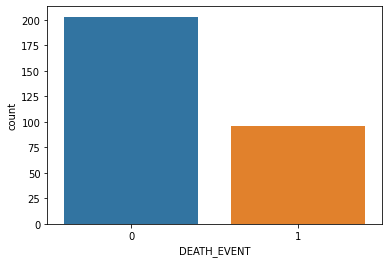

In [ ]:
sns.countplot(x='DEATH_EVENT', data=data)

In [ ]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


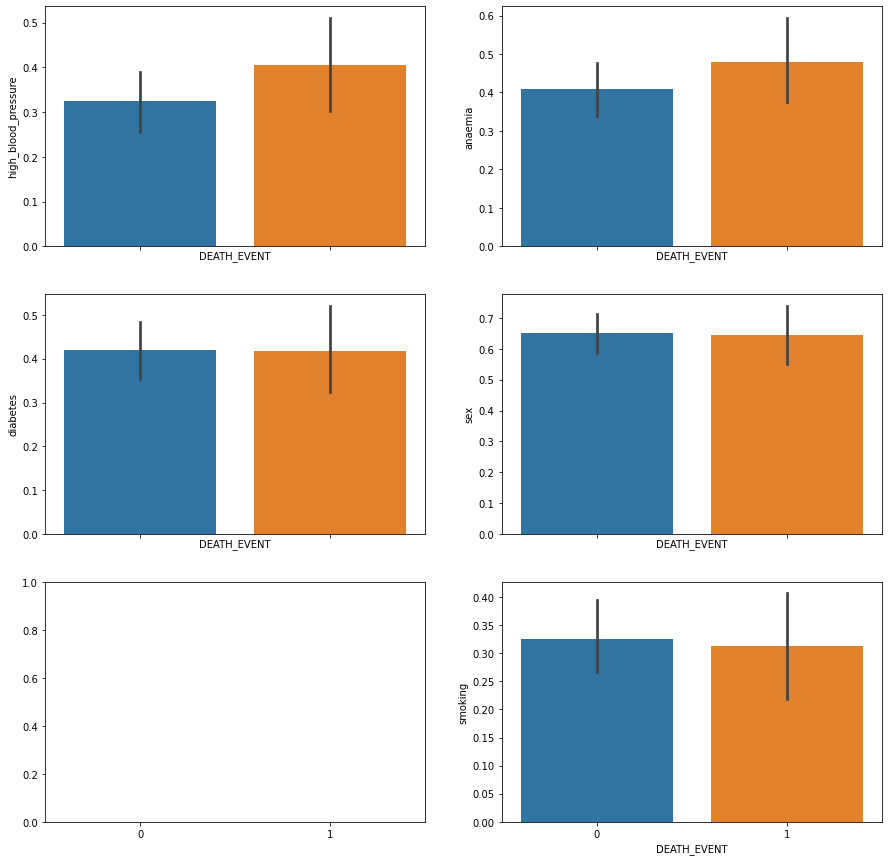

In [ ]:
fig,axes = plt.subplots(3, 2, figsize=(15,15), sharex=True)

sns.barplot(x='DEATH_EVENT', y='high_blood_pressure', data=data, ax=axes[0,0])
sns.barplot(x='DEATH_EVENT', y='anaemia', data=data, ax=axes[0,1])
sns.barplot(x='DEATH_EVENT', y='diabetes', data=data, ax=axes[1,0])
sns.barplot(x='DEATH_EVENT', y='sex', data=data, ax=axes[1,1])
sns.barplot(x='DEATH_EVENT', y='smoking', data=data, ax=axes[2,0])

plt.show()

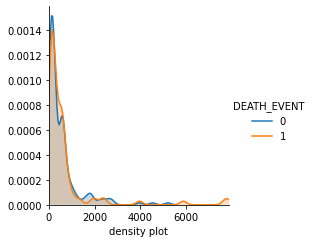

In [ ]:
plot1 = sns.FacetGrid(data=data, hue='DEATH_EVENT', height=3.5)
plot1.map(sns.kdeplot, 'creatinine_phosphokinase', shade=True)
plot1.set(xlim=(0, data['creatinine_phosphokinase'].max()))
plot1.set_axis_labels('density plot')
plot1.add_legend()

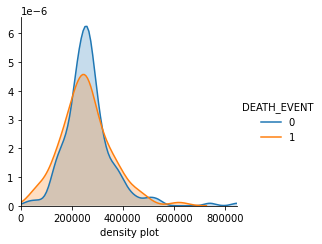

In [ ]:
plot1 = sns.FacetGrid(data=data, hue='DEATH_EVENT', height=3.5)
plot1.map(sns.kdeplot, 'platelets', shade=True)
plot1.set(xlim=(0, data['platelets'].max()))
plot1.set_axis_labels('density plot platelets')
plot1.add_legend()

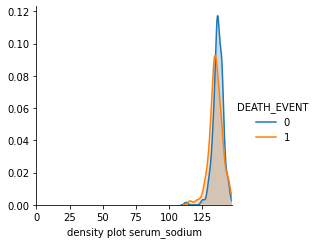

In [ ]:
plot1 = sns.FacetGrid(data=data, hue='DEATH_EVENT', height=3.5)
plot1.map(sns.kdeplot, 'serum_sodium', shade=True)
plot1.set(xlim=(0, data['serum_sodium'].max()))
plot1.set_axis_labels('density plot serum_sodium')
plot1.add_legend()

In [ ]:
X = data.drop('DEATH_EVENT', axis=1)
y = data['DEATH_EVENT']
print('featues shape {}'.format(X.shape))
print('target shape {}'.format(y.shape))

featues shape (299, 12)
target shape (299,)


In [ ]:
from sklearn.model_selection import train_test_split
#from sklearn.tree import DecisionTreeClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
df = DecisionTreeClassifier(criterion='entropy')

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
df.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
pred_df = df.predict(X_test)
pred_df

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred_df)

0.7666666666666667

------------------------------------------------------------------End

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score

In [ ]:
from sklearn.model_selection import GridSearchCV
#Choose best parameters for randomforest
def best_params(train_x, train_y):
  rfc = RandomForestClassifier()
  param_grid = {
      'n_estimators': [200, 500],
      'max_features': ['auto', 'sqrt', 'log2'],
      'max_depth' : [4,5,6,7,8],
      'criterion' :['gini', 'entropy']
      }
  CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
  CV_rfc.fit(train_x, train_y)
  return CV_rfc.best_params_

print(best_params(X_train, y_train))

{'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'n_estimators': 200}


In [ ]:
forest = RandomForestClassifier(n_estimators=200, criterion='gini', max_features='log2', max_depth=4)

In [ ]:
splits = 10
skf = StratifiedKFold(n_splits=splits,random_state=22,shuffle=True)
skf.get_n_splits(X, y)
score_avg = []

for (train, test), i in zip(skf.split(X, y), range(10)):
   forest.fit(X.iloc[train], y.iloc[train])
   score_avg.append(f1_score(y_pred=forest.predict(X.iloc[test]), y_true=y.iloc[test]))
print(pd.DataFrame(data=score_avg))
print(sum(score_avg)/len(score_avg))  

          0
0  0.588235
1  0.705882
2  0.800000
3  0.777778
4  0.625000
5  0.761905
6  0.800000
7  0.823529
8  0.666667
9  0.700000
0.7248996265172736


In [ ]:
splits = 10
skf = StratifiedKFold(n_splits=splits,random_state=22,shuffle=True)
skf.get_n_splits(X, y)
score_avg = []

for (train, test), i in zip(skf.split(X, y), range(10)):
   forest.fit(X.iloc[train], y.iloc[train])
   score_avg.append(f1_score(y_pred=forest.predict(X.iloc[test]), y_true=y.iloc[test]))
print(pd.DataFrame(data=score_avg))
print(sum(score_avg)/len(score_avg))  

          0
0  0.666667
1  0.705882
2  0.800000
3  0.823529
4  0.666667
5  0.761905
6  0.714286
7  0.875000
8  0.625000
9  0.777778
0.741671335200747


In [ ]:
forest

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)